In [23]:
import openai
import yaml
import sys, os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

from src.utils import *

# load yaml config
with open("../config.yml", "r") as f:
    config = yaml.safe_load(f)

openai.api_key = config["OPENAI_KEY"]

## Load, clean and optimize SVGs

In [24]:
svg_full = open("../data/svgs/bottom_app_bar_full.svg", "r").read()
remove_style("../data/svgs/bottom_app_bar_full.svg", "../data/svgs/bottom_app_bar_full_optimized.svg")
run_svgoptim("../data/svgs/bottom_app_bar_full_optimized.svg", "../data/svgs/bottom_app_bar_full_optimized.svg")
svg_full_opt = open("../data/svgs/bottom_app_bar_full_optimized.svg", "r").read()

svg_short = open("../data/svgs/bottom_app_bar_short.svg", "r").read()
remove_style("../data/svgs/bottom_app_bar_short.svg", "../data/svgs/bottom_app_bar_short_optimized.svg")
run_svgoptim("../data/svgs/bottom_app_bar_short_optimized.svg", "../data/svgs/bottom_app_bar_short_optimized.svg")
svg_short_opt = open("../data/svgs/bottom_app_bar_short_optimized.svg", "r").read()


bottom_app_bar_full_optimized.svg:
Done in 213 ms!
30.955 KiB - 61.7% = 11.857 KiB

bottom_app_bar_short_optimized.svg:
Done in 98 ms!
12.4 KiB - 60.7% = 4.877 KiB


## Size and length

In [25]:
import tiktoken
# visualizing the work of the tokenizer
# example https://platform.openai.com/tokenizer
encoder = tiktoken.encoding_for_model("gpt-3.5-turbo")

In [26]:
len(svg_full), len(svg_full_opt), len(svg_short), len(svg_short_opt)

(162536, 12142, 12750, 4994)

In [27]:
len(encoder.encode(svg_full)), len(encoder.encode(svg_full_opt)), len(encoder.encode(svg_short)), len(encoder.encode(svg_short_opt))

(107697, 5679, 6238, 2439)

## Quality checks

In [28]:
from src.svg_quality_checks import *

In [29]:
print(validate_svg(svg_full))
print(validate_svg(svg_full_opt))
print(validate_svg(svg_short))
print(validate_svg(svg_short_opt))

True
True
True
True


In [30]:
print(get_svg_size(svg_full))
print(get_svg_size(svg_full_opt))
print(get_svg_size(svg_short))
print(get_svg_size(svg_short_opt))


(430.0, 300.0)
(430.0, 300.0)
(390.0, 80.0)
(390.0, 80.0)


## Images visualization

In [31]:
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPM, renderPDF
from IPython.display import Image

drawing = svg2rlg('../data/svgs/bottom_app_bar_short_optimized.svg')
renderPM.drawToFile(drawing, '../data/pngs/bottom_app_bar_short_optimized.png', fmt="PNG")

drawing = svg2rlg('../data/svgs/bottom_app_bar_full_optimized.svg')
renderPM.drawToFile(drawing, '../data/pngs/bottom_app_bar_full_optimized.png', fmt="PNG")

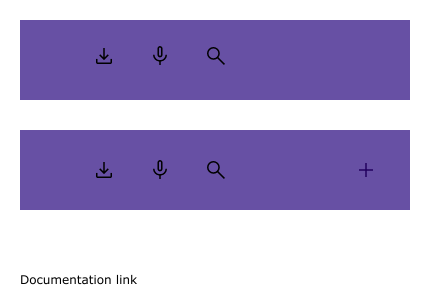

In [32]:
Image(filename='../data/pngs/bottom_app_bar_full_optimized.png', width=400, height=300)

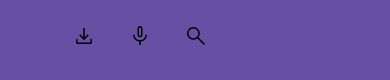

In [33]:
Image(filename='../data/pngs/bottom_app_bar_short_optimized.png', width=400, height=300)